In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Exercício Regressão

## Primeira parte:

- Utilizar os dados do gapminder.csv para determinar a expectativa de vida em um país baseado em features como GDP do país, taxa de fertilidade e população. Como a variável alvo é quantitativa o problema é de regressão.
- Ajuste uma Regressão Linear com apenas a feature fertilidade (fertility), que é o número médio de crianças que uma mulher dá a luz. lembre-se de usar o `.reshape` do `numpy`.
- Crie o `prediction_space` usando `numpy.linspace()`.

In [229]:
df = pd.read_csv("gm_2008_region.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [230]:
df["Region"].unique()

array(['Middle East & North Africa', 'Sub-Saharan Africa', 'America',
       'Europe & Central Asia', 'East Asia & Pacific', 'South Asia'],
      dtype=object)

In [231]:
#df = df[df["Region"]=="America"] #score ficou negativo, provavelmente poucos dados para predição?
df = df.drop("Region",axis=1) #coluna removida pois não permite o treino por ser formato string

In [232]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [233]:
X = df.drop("life", axis=1).values
X

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.2314000e+04,
        1.2990490e+02, 2.9500000e+01],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 7.1030000e+03,
        1.3012470e+02, 1.9200000e+02],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 1.4646000e+04,
        1.1889150e+02, 1.5400000e+01],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 4.0850000e+03,
        1.2193670e+02, 2.6200000e+01],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 3.0390000e+03,
        1.3244930e+02, 9.4900000e+01],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 1.2860000e+03,
        1.3197450e+02, 9.8300000e+01]])

In [234]:
y = df["life"].values

In [235]:
y

array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

In [236]:
fertility = X[:,1]
fertility

array([2.73, 6.43, 2.24, 1.4 , 1.96, 1.41, 1.99, 1.89, 2.38, 1.83, 1.42,
       1.82, 2.91, 5.27, 2.51, 3.48, 2.86, 1.9 , 1.43, 6.04, 6.48, 3.05,
       5.17, 1.68, 6.81, 1.89, 2.43, 5.05, 5.1 , 1.91, 4.91, 1.43, 1.5 ,
       1.89, 3.76, 2.73, 2.95, 2.32, 5.31, 5.16, 1.62, 2.74, 1.85, 1.97,
       4.28, 5.8 , 1.79, 1.37, 4.19, 1.46, 4.12, 5.34, 5.25, 2.74, 3.5 ,
       3.27, 1.33, 2.12, 2.64, 2.48, 1.88, 2.  , 2.92, 1.39, 2.39, 1.34,
       2.51, 4.76, 1.5 , 1.57, 3.34, 5.19, 1.42, 1.63, 4.79, 5.78, 2.05,
       2.38, 6.82, 1.38, 4.94, 1.58, 2.35, 1.49, 2.37, 2.44, 5.54, 2.05,
       2.9 , 1.77, 2.12, 2.72, 7.59, 6.02, 1.96, 2.89, 3.58, 2.61, 4.07,
       3.06, 2.58, 3.26, 1.33, 1.36, 2.2 , 1.34, 1.49, 5.06, 5.11, 1.41,
       5.13, 1.28, 1.31, 1.43, 7.06, 2.54, 1.42, 2.32, 4.79, 2.41, 3.7 ,
       1.92, 1.47, 3.7 , 5.54, 1.48, 4.88, 1.8 , 2.04, 2.15, 6.34, 1.38,
       1.87, 2.07, 2.11, 2.46, 1.86, 5.88, 3.85])

In [237]:
type(fertility), type(y)

(numpy.ndarray, numpy.ndarray)

In [238]:
y = y.reshape(-1,1)
y

array([[75.3],
       [58.3],
       [75.5],
       [72.5],
       [81.5],
       [80.4],
       [70.6],
       [72.2],
       [68.4],
       [75.3],
       [70.1],
       [79.4],
       [70.7],
       [63.2],
       [67.6],
       [70.9],
       [61.2],
       [73.9],
       [73.2],
       [59.4],
       [57.4],
       [66.2],
       [56.6],
       [80.7],
       [54.8],
       [78.9],
       [75.1],
       [62.6],
       [58.6],
       [79.7],
       [55.9],
       [76.5],
       [77.8],
       [78.7],
       [61. ],
       [74. ],
       [70.1],
       [74.1],
       [56.7],
       [60.4],
       [74. ],
       [65.7],
       [79.4],
       [81. ],
       [57.5],
       [62.2],
       [72.1],
       [80. ],
       [62.7],
       [79.5],
       [70.8],
       [58.3],
       [51.3],
       [63. ],
       [61.7],
       [70.9],
       [73.8],
       [82. ],
       [64.4],
       [69.5],
       [76.9],
       [79.4],
       [80.9],
       [81.4],
       [75.5],
       [82.6],
       [66

In [239]:
fertility = fertility.reshape(-1,1)
fertility

array([[2.73],
       [6.43],
       [2.24],
       [1.4 ],
       [1.96],
       [1.41],
       [1.99],
       [1.89],
       [2.38],
       [1.83],
       [1.42],
       [1.82],
       [2.91],
       [5.27],
       [2.51],
       [3.48],
       [2.86],
       [1.9 ],
       [1.43],
       [6.04],
       [6.48],
       [3.05],
       [5.17],
       [1.68],
       [6.81],
       [1.89],
       [2.43],
       [5.05],
       [5.1 ],
       [1.91],
       [4.91],
       [1.43],
       [1.5 ],
       [1.89],
       [3.76],
       [2.73],
       [2.95],
       [2.32],
       [5.31],
       [5.16],
       [1.62],
       [2.74],
       [1.85],
       [1.97],
       [4.28],
       [5.8 ],
       [1.79],
       [1.37],
       [4.19],
       [1.46],
       [4.12],
       [5.34],
       [5.25],
       [2.74],
       [3.5 ],
       [3.27],
       [1.33],
       [2.12],
       [2.64],
       [2.48],
       [1.88],
       [2.  ],
       [2.92],
       [1.39],
       [2.39],
       [1.34],
       [2.

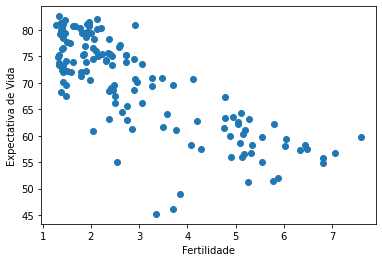

In [240]:
plt.scatter(fertility, y)
plt.ylabel('Expectativa de Vida')
plt.xlabel('Fertilidade')
plt.show()

In [241]:
regression = linear_model.LinearRegression()

In [242]:
regression.fit(fertility, y)

LinearRegression()

In [243]:
min(fertility)

array([1.28])

In [244]:
max(fertility)

array([7.59])

In [245]:
prediction_space = np.linspace(min(fertility), max(fertility)).reshape(-1,1)
prediction_space

array([[1.28      ],
       [1.40877551],
       [1.53755102],
       [1.66632653],
       [1.79510204],
       [1.92387755],
       [2.05265306],
       [2.18142857],
       [2.31020408],
       [2.43897959],
       [2.5677551 ],
       [2.69653061],
       [2.82530612],
       [2.95408163],
       [3.08285714],
       [3.21163265],
       [3.34040816],
       [3.46918367],
       [3.59795918],
       [3.72673469],
       [3.8555102 ],
       [3.98428571],
       [4.11306122],
       [4.24183673],
       [4.37061224],
       [4.49938776],
       [4.62816327],
       [4.75693878],
       [4.88571429],
       [5.0144898 ],
       [5.14326531],
       [5.27204082],
       [5.40081633],
       [5.52959184],
       [5.65836735],
       [5.78714286],
       [5.91591837],
       [6.04469388],
       [6.17346939],
       [6.3022449 ],
       [6.43102041],
       [6.55979592],
       [6.68857143],
       [6.81734694],
       [6.94612245],
       [7.07489796],
       [7.20367347],
       [7.332

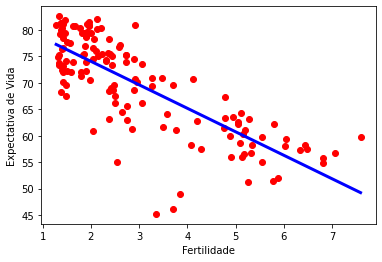

In [246]:
plt.scatter(fertility, y, color='red')
plt.plot(prediction_space, regression.predict(prediction_space), color='blue', linewidth=3)
plt.ylabel('Expectativa de Vida')
plt.xlabel('Fertilidade')
plt.show()

## Segunda parte:

- use `train_test_split(X, y, test_size = 0.3, random_state=42` para dividir os dados em conjunto de treinamento e conjunto de teste.
- Utilize todas as features.
- compute a `R**2` usando o método .score().

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [248]:
regression_all = linear_model.LinearRegression()

In [249]:
regression_all.fit(X_train, y_train)

LinearRegression()

In [250]:
y_pred = regression_all.predict(X_test)

In [251]:
regression_all.score(X_test, y_test)

0.8380468731430057

## Terceira parte (Croos-Validation):
 - A validação cruzada é um passo importante para avaliar um modelo. Ela maximiza a quantidade de dados que é usada para treinar o modelo, devido a durante o treinamento, o modelo não é apenas treinado, mas também testado em todo o dado disponível.
 - Use 5-fold cross validation nos dados. A função cross-val-score() usa `R**2` por padrão como métrica para avaliar a regressao. A função retornará 5 scores (5-fold cv), compute a média desses scores.


In [252]:
regression = linear_model.LinearRegression()

In [253]:
cross_validation_results = cross_val_score(regression, X, y, cv=5)

In [254]:
cross_validation_results

array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])

In [255]:
cross_validation_results.mean()

0.8599627722793596

## Quarta parte (usando Lasso Regretion para determinar qual a feature mais importante para determinar a taxa de fertilidade
- Instancie o regressor Lasso com `alpha=0.4` e `normalize=True`.
- Use Fit nos dados e compute os coeficientes usanto o atributo `.coef_`.
- Plote os coeficientes no eixo-y e os nomes das colunas no eixo-x.


##### Instancie o regressor Lasso com `alpha=0.4` e `normalize=True`.


In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [257]:
lasso = Lasso(alpha=0.4, normalize=True)

##### Use Fit nos dados e compute os coeficientes usanto o atributo `.coef_`.


In [258]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.4, normalize=True)

In [259]:
lasso_pred = lasso.predict(X_test)

In [260]:
lasso.score(X_test, y_test)

0.6660274241031177

In [262]:
names = df.drop("life", axis=1).columns

In [264]:
lasso = Lasso(alpha=0.1, normalize=True)

In [265]:
lasso_coef = lasso.fit(X, y).coef_

##### Plote os coeficientes no eixo-y e os nomes das colunas no eixo-x.


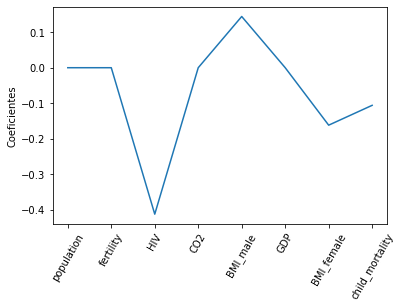

In [266]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coeficientes')
plt.show()

In [267]:
lasso_coef

array([-0.00000000e+00, -0.00000000e+00, -4.12129267e-01,  0.00000000e+00,
        1.44155041e-01,  5.49253471e-05, -1.61698111e-01, -1.05840073e-01])